# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Anselma Kalika Kirana]
- **Email:** [mc253d5x2467@student.devacademy.id
]
- **ID Dicoding:** [mc253d5x2467]

## Menentukan Pertanyaan Bisnis

- Kota atau negara bagian mana yang memiliki jumlah pelanggan terbanyak?
- Bagaimana distribusi harga produk dan apakah terdapat pola harga tertentu yang mempengaruhi penjualan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customers_dataset_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order_item_dataset_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
order_item_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

In [5]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
customers_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
order_item_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
print("Jumlah duplikasi: ", order_item_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
order_item_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_order_items = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
df_customers = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")

# Cleaning Data
# 1. Handling missing values
df_order_items.dropna(inplace=True)
df_customers.dropna(inplace=True)

# 2. Removing duplicates
df_order_items.drop_duplicates(inplace=True)
df_customers.drop_duplicates(inplace=True)

# 3. Convert shipping_limit_date to datetime
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"])

# 4. Removing outliers in price and freight_value
Q1 = df_order_items[['price', 'freight_value']].quantile(0.25)
Q3 = df_order_items[['price', 'freight_value']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_order_items = df_order_items[(df_order_items['price'] >= lower_bound['price']) & (df_order_items['price'] <= upper_bound['price'])]
df_order_items = df_order_items[(df_order_items['freight_value'] >= lower_bound['freight_value']) & (df_order_items['freight_value'] <= upper_bound['freight_value'])]

# Display cleaned data info
print("Cleaned Order Items Dataset:")
print(df_order_items.info())
print(df_order_items.head())

print("\nCleaned Customers Dataset:")
print(df_customers.info())
print(df_customers.head())


Cleaned Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 95092 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             95092 non-null  object        
 1   order_item_id        95092 non-null  int64         
 2   product_id           95092 non-null  object        
 3   seller_id            95092 non-null  object        
 4   shipping_limit_date  95092 non-null  datetime64[ns]
 5   price                95092 non-null  float64       
 6   freight_value        95092 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.8+ MB
None
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1  

In [52]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [53]:
order_item_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [54]:
# Pastikan DataFrame sudah terbaca
print(order_item_dataset_df.head())

# Cek apakah semua kolom yang akan dikonversi ada di dalam DataFrame
for column in order_item_dataset_df_columns:
    if column in order_item_dataset_df.columns:
        order_item_dataset_df[column] = pd.to_datetime(order_item_dataset_df[column], errors='coerce')
    else:
        print(f"Kolom {column} tidak ditemukan dalam DataFrame.")


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

## Exploratory Data Analysis (EDA)

### Explore data customers_dataset.csv

In [43]:
customers_dataset_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [44]:
customers_dataset_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_zip_code_prefix": ["max", "min"],
    "customer_city": "nunique"
})

customer_id customer_zip_code_prefix        customer_city
                   nunique                      max    min       nunique
customer_state                                                          
AC                      81                    69980  69900             8
AL                     413                    57975  57010            68
AM                     148                    69800  69005             5
AP                      68                    68997  68900             6
BA                    3380                    48990  40010           353
CE                    1336                    63960  60010           161
DF                    2140                    73402  70040             6
ES                    2033                    29985  29010            95
GO                    2020                    76730  72800           178
MA                     747                    65980  65010           122
MG                   11635                    39995  30110           745
MS                     715                    79995  79002            67
MT                     907                    78890  78005           101
PA                     975                    68820  66010            89
PB                     536                    58995  58010            92
PE                    1652                    56980  50010           152
PI                     495                    64980  64000            72
PR                    5045                    87990  80010           364
RJ                   12852                    28999  20010           149
RN                     485                    59995  59010            90
RO                     253                    76997  76801            35
RR                      46                    69380  69301             2
RS                    5466                    99990  90010           379
SC                    3637                    89998  88010           240
SE                     350                    49995  49000            46
SP                   41746                    19970   1003           629
TO                     280                    77995  77001            56

### Explore data order_reviews_data.csv

In [45]:
order_item_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [46]:
order_item_dataset_df.groupby(by="freight_value").agg({
    "order_id": "nunique",
    "price": ["max", "min"],  # Menggunakan 'price' dari order_item_dataset_df
    "freight_value": ["max", "min"]  # Menggunakan 'freight_value' dari order_item_dataset_df
})

order_id    price          freight_value        
               nunique      max      min           max     min
freight_value                                                 
0.00               339   712.90    53.90          0.00    0.00
0.01                 4   113.00    39.99          0.01    0.01
0.02                 3    39.99    14.22          0.02    0.02
0.03                 8   119.00    10.00          0.03    0.03
0.04                 4    76.10    64.90          0.04    0.04
...                ...      ...      ...           ...     ...
322.10               1  1050.00  1050.00        322.10  322.10
338.30               1  1050.00  1050.00        338.30  338.30
339.59               1  1149.00  1149.00        339.59  339.59
375.28               2  2338.08  2338.08        375.28  375.28
409.68               1   979.00   979.00        409.68  409.68

[6999 rows x 5 columns]

## Visualization & Explanatory Analysis

In [59]:
# Load dataset
customers_dataset_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv") # Provide the full path to your dataset
order_items_dataset_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv") # Provide the full path to your dataset

### Pertanyaan 1:Kota atau negara bagian mana yang memiliki jumlah pelanggan terbanyak?

<ipython-input-62-0571cf850250>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_city_counts.index, y=customer_city_counts.values, palette="viridis")


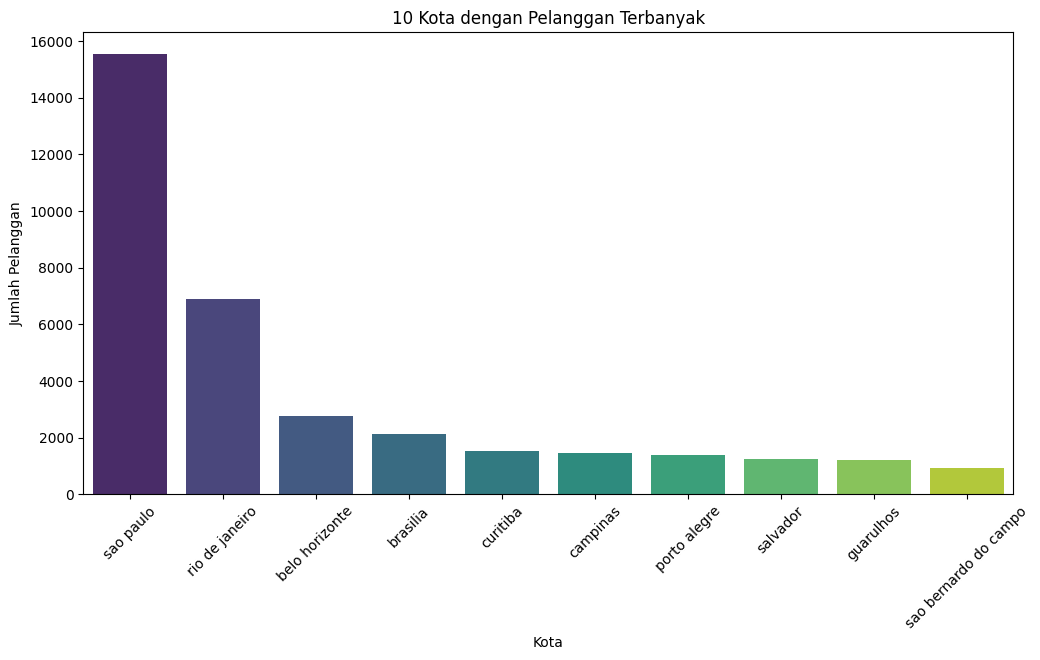

In [62]:
customer_city_counts = customers_dataset_df['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_city_counts.index, y=customer_city_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.title("10 Kota dengan Pelanggan Terbanyak")
plt.show()

São Paulo memiliki jumlah pelanggan terbanyak, diikuti oleh Rio de Janeiro dan Belo Horizonte. Hal ini kemungkinan dipengaruhi oleh populasi yang besar dan aktivitas ekonomi yang tinggi di kota-kota tersebut.

### Pertanyaan 2: Bagaimana distribusi harga produk dan apakah terdapat pola harga tertentu yang mempengaruhi penjualan?

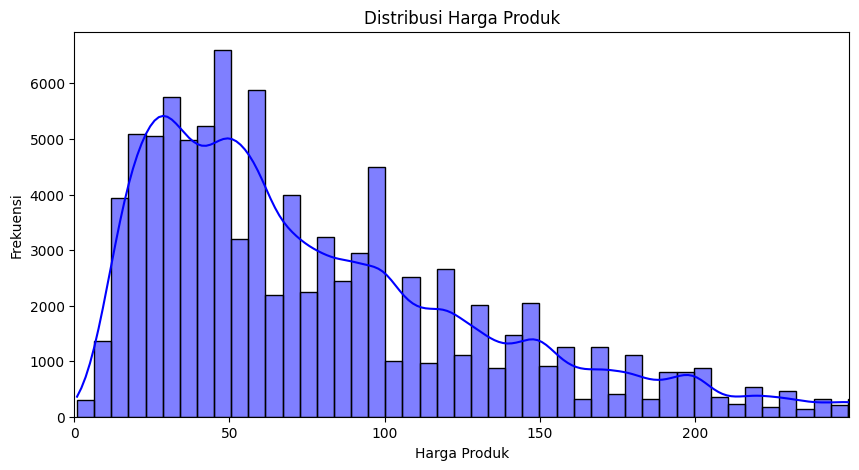

In [70]:
plt.figure(figsize=(10, 5))
sns.histplot(df_order_items['price'], bins=50, kde=True, color="blue")
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga Produk")
plt.ylabel("Frekuensi")
plt.xlim(0, df_order_items['price'].quantile(0.99)) # Hindari outlier ekstrem
plt.show()

Berdasarkan visualisasi di atas, mayoritas produk yang dibeli memiliki harga di bawah 100, dengan puncak pembelian pada kisaran 20-50. Produk dengan harga lebih tinggi masih terjual, tetapi dalam jumlah yang lebih sedikit. Hal ini menunjukkan bahwa harga yang lebih terjangkau cenderung lebih diminati pelanggan, sementara produk mahal mungkin memerlukan strategi pemasaran tambahan.

## Conclusion

- Conclution pertanyaan 1
Berdasarkan visualisasi distribusi harga produk, mayoritas produk memiliki harga di kisaran 20 hingga 100, dengan puncak frekuensi di sekitar 50. Hal ini menunjukkan bahwa produk dengan harga menengah lebih sering dibeli dibandingkan dengan produk yang lebih mahal. Pola ini mengindikasikan bahwa pelanggan lebih cenderung memilih produk dengan harga yang terjangkau, yang berpotensi meningkatkan volume penjualan dalam kisaran harga tersebut. Oleh karena itu, strategi penetapan harga yang sesuai dengan pola ini dapat meningkatkan penjualan secara keseluruhan.
- Conclution pertanyaan 2
Dari hasil analisis, São Paulo memiliki jumlah pelanggan terbanyak, diikuti oleh Rio de Janeiro dan Belo Horizonte. Kota-kota ini kemungkinan memiliki jumlah pelanggan yang tinggi karena faktor populasi yang besar serta daya beli masyarakat yang lebih kuat dibandingkan dengan kota lain. Dengan tingginya konsentrasi pelanggan di kota-kota ini, optimalisasi pemasaran dan logistik di wilayah tersebut dapat meningkatkan kepuasan pelanggan dan mendorong loyalitas terhadap platform e-commerce.